In [14]:
#Load the CIFAR-10 dataset and preprocess it


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [2]:
#LeNet Implementation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

lenet_model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D(),
    Conv2D(16, (5, 5), activation='relu'),
    AveragePooling2D(),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
391/391 [==============================] - 5s 12ms/step - loss: 1.7350 - accuracy: 0.3711 - val_loss: 1.5483 - val_accuracy: 0.4275
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 1.4675 - accuracy: 0.4692 - val_loss: 1.4191 - val_accuracy: 0.4826
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.3686 - accuracy: 0.5091 - val_loss: 1.3552 - val_accuracy: 0.5045
Epoch 4/10
391/391 [==============================] - 5s 12ms/step - loss: 1.3004 - accuracy: 0.5355 - val_loss: 1.3311 - val_accuracy: 0.5213
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 1.2433 - accuracy: 0.5576 - val_loss: 1.2385 - val_accuracy: 0.5551
Epoch 6/10
391/391 [==============================] - 5s 12ms/step - loss: 1.1936 - accuracy: 0.5753 - val_loss: 1.2399 - val_accuracy: 0.5579
Epoch 7/10
391/391 [==============================] - 5s 12ms/step - loss: 1.1545 - accuracy: 0.5905 - val_loss: 1.2327 - val_accuracy: 0.5680

In [3]:
#AlexNet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

alexnet_model = Sequential([
    Conv2D(48, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(192, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# VGG16 and VGG19 Implementation

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Load the VGG16 model pre-trained on ImageNet, without the top layer, and set input shape to CIFAR-10 images
vgg16_base = VGG16(weights=None, include_top=False, input_tensor=Input(shape=(32, 32, 3)))

# Add custom layers on top of VGG16
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

vgg16_model = Model(inputs=vgg16_base.input, outputs=predictions)

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
391/391 [==============================] - 691s 2s/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
391/391 [==============================] - 687s 2s/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
391/391 [==============================] - 662s 2s/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
391/391 [==============================] - 633s 2s/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 635s 2s/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 716s 2s/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
391/391 [==============================] - 693s 2s/step - loss: 2.3027 - accuracy: 0.0963 - val_loss: 2.3026 - val_accuracy: 0.1000

In [ ]:
#Apply modified architecture to your own selected dataset and train it.

In [27]:
#5.Apply modified architecture to your own selected dataset and train it.
#Define the Model (Modified AlexNet for CIFAR-10)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def create_modified_alexnet():
    model = Sequential([
        Conv2D(48, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Conv2D(192, (3, 3), activation='relu', padding='same'),
        Conv2D(192, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

alexnet_model = create_modified_alexnet()
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
#Train The Model

history = alexnet_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 62s 99ms/step - loss: 1.7262 - accuracy: 0.3502 - val_loss: 1.3754 - val_accuracy: 0.4865
Epoch 2/10
625/625 [==============================] - 69s 111ms/step - loss: 1.2860 - accuracy: 0.5337 - val_loss: 1.1070 - val_accuracy: 0.6074
Epoch 3/10
625/625 [==============================] - 70s 112ms/step - loss: 1.0637 - accuracy: 0.6246 - val_loss: 0.9638 - val_accuracy: 0.6581
Epoch 4/10
625/625 [==============================] - 87s 140ms/step - loss: 0.9213 - accuracy: 0.6762 - val_loss: 0.8757 - val_accuracy: 0.6913
Epoch 5/10
625/625 [==============================] - 85s 136ms/step - loss: 0.8094 - accuracy: 0.7190 - val_loss: 0.8356 - val_accuracy: 0.7107
Epoch 6/10
625/625 [==============================] - 80s 129ms/step - loss: 0.7140 - accuracy: 0.7526 - val_loss: 0.8199 - val_accuracy: 0.7161
Epoch 7/10
625/625 [==============================] - 82s 132ms/step - loss: 0.6423 - accuracy: 0.7763 - val_loss: 0.7929 - val_acc

In [29]:
#6.Evaluate your model on testing set
#Evaluate the Model

test_loss, test_accuracy = alexnet_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


313/313 [==============================] - 6s 18ms/step - loss: 0.9512 - accuracy: 0.7106
Test Accuracy: 71.06%


In [30]:
#7. Save the improved model and use it for prediction on testing data

# Save the model with a .keras extension
alexnet_model.save('modified_alexnet_cifar10.keras')

In [31]:
# Load the Saved model

from tensorflow.keras.models import load_model
loaded_model = load_model('modified_alexnet_cifar10.keras')


In [32]:
#Use the Model for Prediction

import numpy as np

# Make predictions
predictions = loaded_model.predict(x_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Compare predictions with true labels
print(f"Predicted classes: {predicted_classes[:10]}")
print(f"True classes: {true_classes[:10]}")


313/313 [==============================] - 5s 16ms/step
Predicted classes: [3 8 8 8 4 6 1 6 5 1]
True classes: [3 8 8 0 6 6 1 6 3 1]


In [10]:
#8. Provide plot of confusion matric

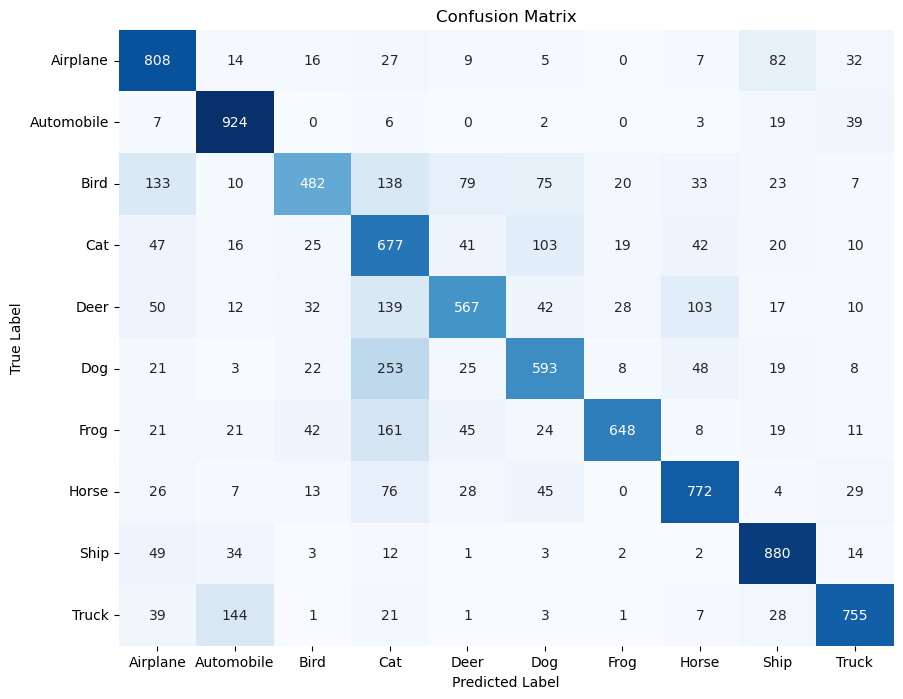

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming `predicted_classes` and `true_classes` are defined as before
conf_mat = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#9. Provide Training and testing Loss and accuracy plots in one plot using subplot command and history object.

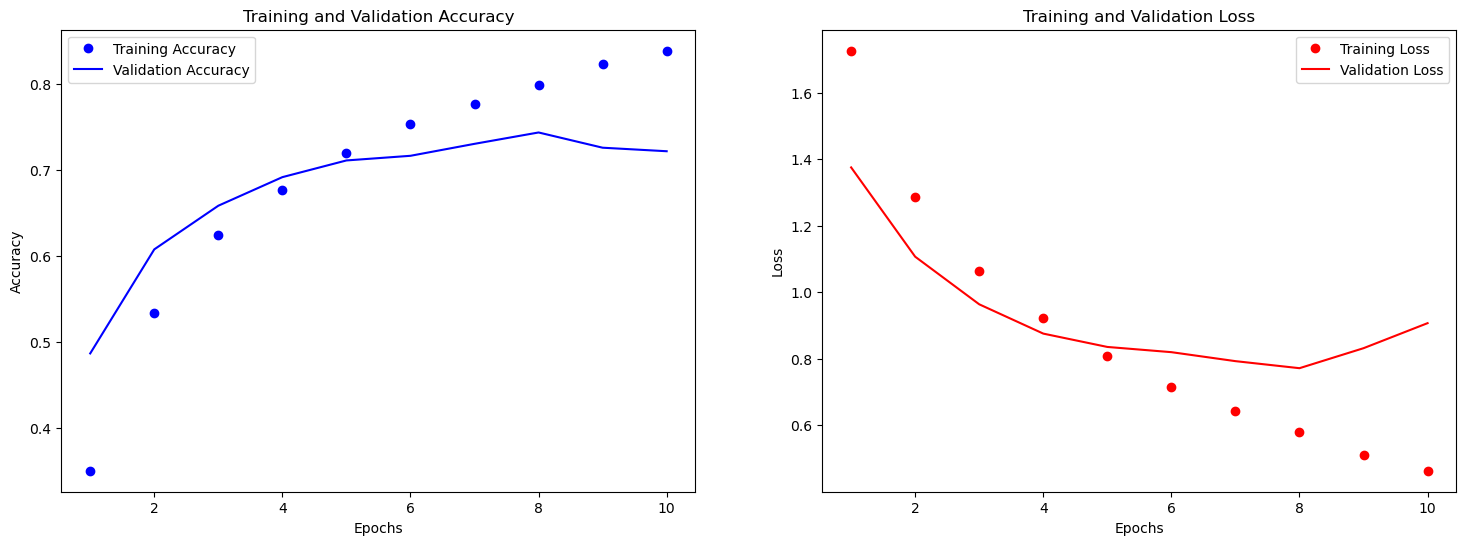

In [34]:
import matplotlib.pyplot as plt

# Access the history from the `history` object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot training and validation accuracy
ax1.plot(epochs, acc, 'bo', label='Training Accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot training and validation loss
ax2.plot(epochs, loss, 'ro', label='Training Loss')
ax2.plot(epochs, val_loss, 'r', label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [ ]:
# 10) Provide at least two more visualizations reflecting your solution. 

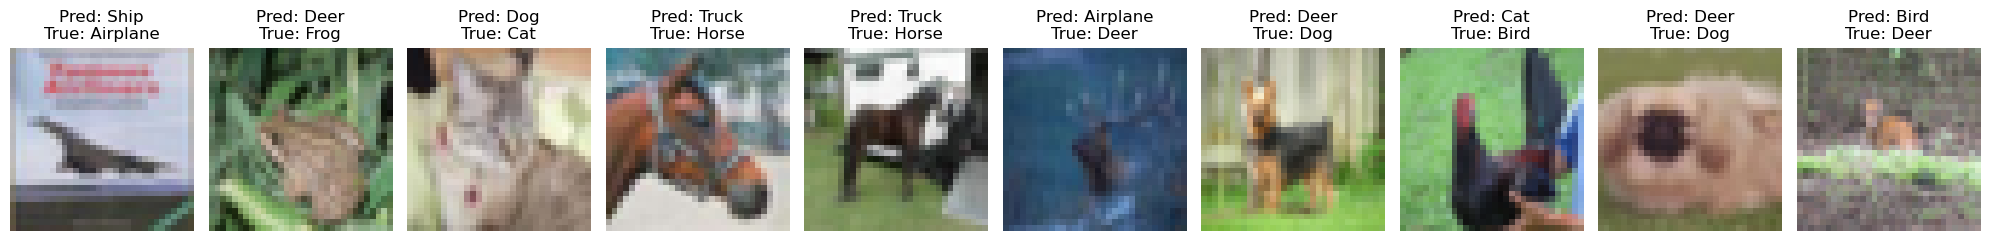

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming predicted_classes and true_classes are defined from your model's predictions and the true labels
# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Identify the indices of incorrect predictions
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Choose a subset of incorrect predictions to visualize
chosen_indices = incorrect_indices[:10]  # Adjust this to visualize more or fewer samples

fig, axes = plt.subplots(nrows=1, ncols=len(chosen_indices), figsize=(20, 4))
if len(chosen_indices) == 1:  # If there's only one incorrect prediction, `axes` will not be an array
    axes = [axes]
for ax, index in zip(axes, chosen_indices):
    ax.imshow(x_test[index], cmap='viridis', interpolation='nearest')
    ax.set_title(f"Pred: {class_names[predicted_classes[index]]}\nTrue: {class_names[true_classes[index]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 32ms/step


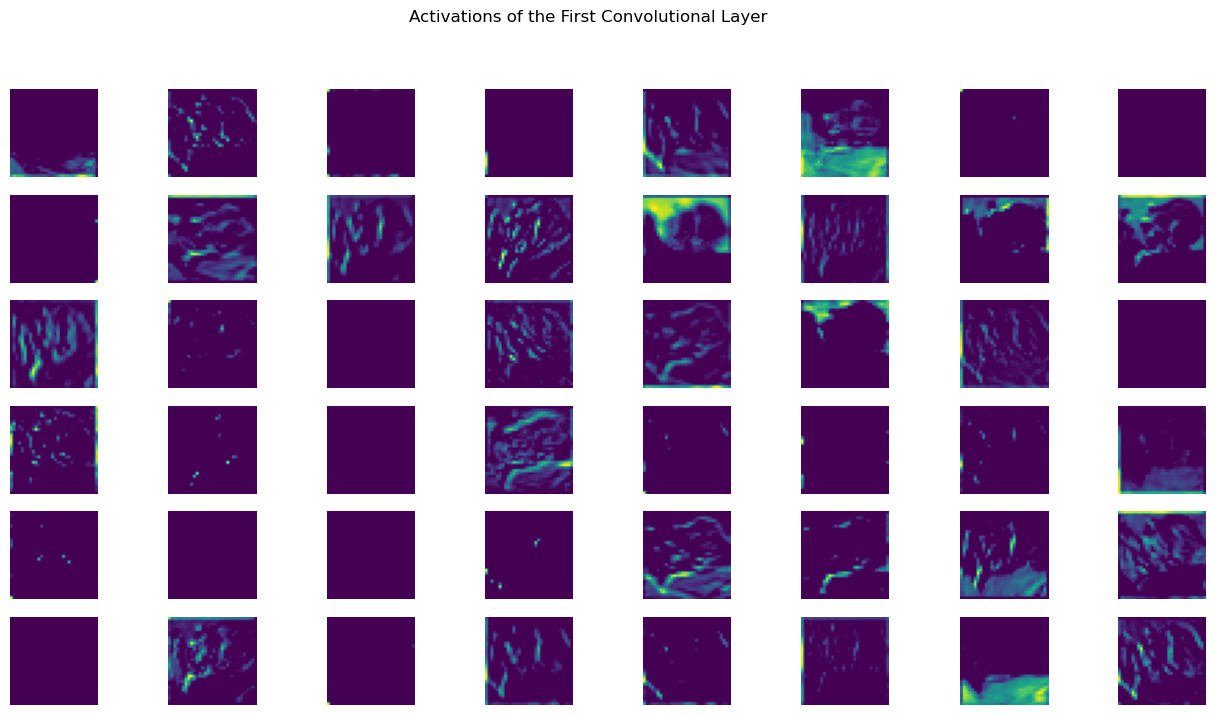

In [37]:
# Visualization 2: Feature Importance Visualization

from tensorflow.keras.models import Model

# Select a correctly classified image
correct_indices = np.where(predicted_classes == true_classes)[0]
sample_index = correct_indices[0]
sample_image = x_test[sample_index:sample_index+1]

# Create a model to fetch the first convolutional layer outputs
layer_outputs = [layer.output for layer in alexnet_model.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=alexnet_model.input, outputs=layer_outputs)
activations = activation_model.predict(sample_image)

# Visualize the activations of the first conv layer
first_layer_activations = activations[0]
plt.figure(figsize=(16, 8))
for i in range(first_layer_activations.shape[-1]):
    plt.subplot(6, 8, i+1)
    plt.imshow(first_layer_activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle('Activations of the First Convolutional Layer')
plt.show()


In [ ]:
#11. Provide logical description of which steps lead to improved response for new dataset when compared with baseline model 
#and enhance architecture and what was its impact on architecture behavior.

#To improve a model's performance on a new dataset compared to a baseline model, focus on data preprocessing
#(normalization, augmentation), architecture customization (adjusting layers, adding batch normalization), 
#hyperparameter tuning (learning rate, batch size), and regularization (dropout, L1/L2 regularization). 
#These steps tailor the model to the new dataset's specifics, optimize training, prevent overfitting, and 
#lead to better generalization and performance.





